In [1]:
#inspect fast5 files

import h5py
import numpy as np
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

input_file = filedialog.askopenfilename()
#input_file = "/media/victor/USB/MSc_basecall/Data/eins3_all/fast5s/1a/FAN19880_6b31a602_0.fast5"
if not input_file.endswith('fast5'):
    print(1)
try:
    fast5_data = h5py.File(input_file, 'r')
except IOError:
    print('Error opening file. Likely a corrupted file.')


#raw_attr = fast5_data['Raw/Reads/']

read_list = list(fast5_data.items())
raw_ids = []

for i in range(len(read_list)):
    readstep = (read_list[i])
    read = readstep[0]
    raw_ids.append( fast5_data[read+'/Raw'].attrs['read_id'].decode('UTF-8') )
    #signal_path = read + '/channel_id/channel_number'#/read_id
    #raw_ids.append(  fast5_data[read+'/channel_id'].attrs['channel_number'].decode('UTF-8') )
print("bf5c2a74-b1e9-4929-b6a4-d6939ac2dcf2" in raw_ids)

False


In [22]:
a = False
a== None

False

In [10]:
s = ''
ss = ''
with open('/media/victor/USB/MSc_basecall/Data/3XR6/ref_3xr6/3xr6.tsv', "r") as inputfile:
    for i, line in enumerate(inputfile):
        if(i>5):
            break
        content = line.strip().split('\t')
        s+=content[1]
        ss+= content[1] + "\n"
print(s)
print('\n\n')
print(ss)

CTACAACGCAGATTACAACCTCAGTTATGAGGACGAATCTCCCGCTTATATATGAGGACGAATCTCCCGCTTATATATGAGGACGAATCTCCCGCTTATACCATCCTTGCCAGCGTTACCCTACAACGCAGATTACAACCTCAGTGGTCTTGACAAACGTGTGCTTGTACGGTCTTGACAAACGTGTGCTTGTACGGTCTTGACAAACGTGTGCTTGTACCCATCCTTGCCAGCGTTACCCTACAACGCAGATTACAACCTCAGTGTTTATCGGGCGTGGTGCTCGCATAGTTTATCGGGCGTGGTGCTCGCATAGTTTATCGGGCGTGGTGCTCGCATACCATCCTTGCCAGCGTTACCCTACAACGCAGATTACAACCTCAGTCCGATGTTGACGGACTAATCCTGACCCGATGTTGACGGACTAATCCTGACCCGATGTTGACGGACTAATCCTGACCCATCCTTGCCAGCGTTACCCTACAACGCAGATTACAACCTCAGTTAGTAGTTCAGACGCCGTTAAGCGCTAGTAGTTCAGACGCCGTTAAGCGCTAGTAGTTCAGACGCCGTTAAGCGCCCATCCTTGCCAGCGTTACCCTACAACGCAGATTACAACCTCAGTCCGTACCTAGATACACTCAATTTGTCCGTACCTAGATACACTCAATTTGTCCGTACCTAGATACACTCAATTTGTCCATCCTTGCCAGCGTTACC



CTACAACGCAGATTACAACCTCAGTTATGAGGACGAATCTCCCGCTTATATATGAGGACGAATCTCCCGCTTATATATGAGGACGAATCTCCCGCTTATACCATCCTTGCCAGCGTTACC
CTACAACGCAGATTACAACCTCAGTGGTCTTGACAAACGTGTGCTTGTACGGTCTTGACAAACGTGTGCTTGTACGGTCTTGACAAACGTGTGCTTGTACCCATCCTTGCCAGCGTTACC
CTACAACGCAGATTACAACCTCAGTGTTTATCGG

In [30]:
import pandas as pd

read_alignment_file = "~/Desktop/pand_database_example.tsv"
df = pd.read_csv(read_alignment_file, header=0, sep='\t')
print(df)
identities = df['Identity']
len(identities[identities==0])




                                   Name  Length  Identity  Relative length
0  00009f20-d8ee-4446-884b-6b73cee4d397     132       0.0              NaN
1  0001a7a6-cd33-4605-ad49-4d0844cfae57     151       0.0              NaN
2  00021be9-02a9-4c6c-8d5d-1f561e13a2b2      69       0.0              NaN
3  00032f88-aa0c-4abb-bb2a-914fee09f687      44       0.0              NaN
4  0003a4e5-b6e8-47f1-b030-48286fba86b8     101       0.0              NaN
5  0004bd44-cea8-46f3-82d9-ed732e973440     137       0.0              NaN
6  000514c0-f7c0-4311-9a7d-93497d0cc198     174       0.0              NaN
7  00058f63-c63f-4b55-8e48-60a08db70f17      69       0.0              NaN


8

In [23]:
import datetime
import time

start_time = datetime.datetime.now()
time.sleep(72.2)
end_time = datetime.datetime.now()
str(end_time - start_time)

'0:01:12.270814'

In [85]:
import pandas as pd
import sys
import collections


#sketch file with the results from alignment 
path = '/media/victor/USB/MSc_basecall/Data/3XR6/fastas_noTrim_full/1a-42k'
read_alignment_file = path + '/1a-42k_result/1a-42k_reads.tsv'
# basecalled file
bc_file = path + '/out.fasta'
# time taken to basecall the folder
caller_time = path + '/caller_time.out'



metrics = {}

###### Alignment results
df = pd.read_csv(read_alignment_file, header=0, sep='\t')
identities = df['Identity']
# the proportion of reads that were not properly aligned
metrics['no_match_ratio'] = len(identities[identities==0]) / len(identities)
# mean identity rate overall
metrics['global_mean_identity'] = identities.mean()
# mean identity rate of matched sequences
metrics['match_mean_identity'] = identities[identities>0].mean()


###### Length statistics
lengths = df['Length']
metrics['mean_read_length'] = lengths.mean()
metrics['median_read_length'] = lengths.median()
metrics['var_read_length'] = lengths.var()


with open(bc_file, 'r') as inputfile:
    count = 0
    for line in inputfile:
        line = line.strip()
        if(line[0]=='>'):
            count+=1

df[df['Identity']>0].iloc[:50]

,Name,Length,Identity,Relative length
87,005cdd5f-0dff-487a-b60a-9a1978dbaca3,153,97.59036,100.00000
196,00c90f9a-addb-462b-89ee-3ef622420b9e,135,96.01224,95.83333
218,00dec1fb-4dc6-48d0-a69f-c74770bfcdd6,194,93.00000,97.97980
293,014129ee-5213-4cc5-ac34-d57daa283a32,153,90.00000,100.00000
365,017704f9-e1e4-4faa-911c-9c76fd06bbd5,133,94.11765,94.11765
484,01f57d47-4ce1-4016-b059-27dcf5d99cc7,158,96.15385,101.96078
626,0292bf09-4e57-4056-a74c-5e7ad36fa594,159,95.45455,97.70115
656,02b188d3-c261-443e-8ede-fdd1f99c3f5c,163,87.71930,98.23009
695,02daccad-a2e2-4b88-9b6a-ae5c3d9f6e27,128,94.04762,98.79518
850,037491fb-d297-4fc5-bea3-9aae8ebd151d,164,84.76190,96.03960


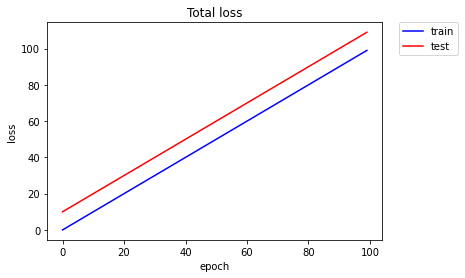

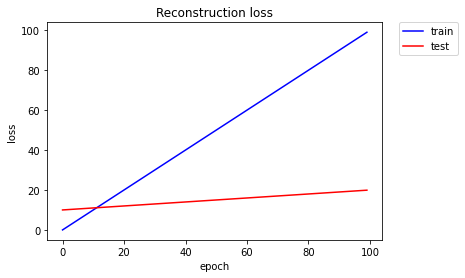

In [34]:
import numpy as np
import torch
import matplotlib.pyplot as plt

fig = plt.figure()

# array of epochs
epoch_array = np.arange(100)
a = epoch_array + 10
b = 0.1*epoch_array + 10

# Total loss
plt.plot(epoch_array, epoch_array, color = 'b', label='train')
plt.plot(epoch_array, a, color = 'r', label='test')
plt.title('Total loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Reconstruction loss
plt.plot(epoch_array, epoch_array, color = 'b', label='train')
plt.plot(epoch_array, b, color = 'r', label='test')
plt.title('Reconstruction loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig('temp.png', dpi=fig.dpi)

In [36]:
BLANK = 0
A = 1
T = 2
C = 3
G = 4
PAD = 5   # padding
BASE_DIC = {'A': A, 'T': T, 'C': C, 'G': G}
a = BASE_DIC.get('A')
print(a)

1


In [1]:
''' translate a string sequence to the corresponding int sequence according to a dic'''
def get_int_ref_seq(ref_sequence, BASE_DIC):
    ref_seq_int = []
    for base in ref_sequence:
        int_base = BASE_DIC.get(base)
        ref_seq_int.append(int_base)
    ref_seq_int = np.array(ref_seq_int)
    return(ref_seq_int)

a = 2
id(a)



94585460704032

In [9]:
sequencing_summary_text = "/media/victor/USB/MSc_basecall/Data/3XR6/guppy/guppy_FILTERED_all/sequencing_summary.txt"

dic_pass_fail = {}
with open(sequencing_summary_text, 'r') as summary:
       for idx, line in enumerate(summary):
              if idx == 0:
                     continue
              elif idx == 1 or idx == 2:
                     line = line.split()
                     print(line)
              else:
                     break


                     
       


['FAN19503_60cb669d_15.fast5', '3a1369d0-531d-4ae0-9754-efc2af1e9495', '60cb669de45a06e721aea1e95f806f96ca22ece8', '0', '175', '4', '4639.448750', '1.433250', '1146', 'FALSE', '4639.563750', '1054', '1.318250', '188', '6.535500', '2.217550', '70.163544', '10.604062', '70.163544', '10.604062']
['FAN19503_60cb669d_15.fast5', 'f2f3aa9b-9f1c-499c-abac-ea01c7944735', '60cb669de45a06e721aea1e95f806f96ca22ece8', '0', '299', '4', '4811.380000', '1.491500', '1193', 'FALSE', '4811.380000', '1193', '1.491500', '305', '6.760495', '2.252614', '81.651283', '15.199156', '81.651283', '15.199156']


In [16]:
import h5py

fast5_fn = "/media/victor/USB/MSc_basecall/Data/3XR6/fast5s/fast5s_filtered_long_resquiggle/one/1a-42k/file_0.fast5"

try:
    fast5_data = h5py.File(fast5_fn, 'r')
except IOError:
    raise IOError('Error opening file. Likely a corrupted file.')

# Get raw data

read = fast5_data['Raw/Reads']
read_id = read[list(read.keys())[0]].attrs['read_id'].decode('UTF-8')
raw_attr = fast5_data['Raw/Reads/']
print(raw_attr)
print(read_id)
read_name = list(raw_attr.keys())[0]
raw_dat = raw_attr[read_name + '/Signal'][()]
print(raw_dat.shape)



KeyError: 'Unable to open object (component not found)'

In [20]:
import glob

inputname = "/media/victor/USB/MSc_basecall/Data/3XR6/fast5s/fast5s_filtered_long_resquiggle/multi/1a-42k/"
folders = glob.glob(inputname + "/*")
folders

['/media/victor/USB/MSc_basecall/Data/3XR6/fast5s/fast5s_filtered_long_resquiggle/multi/1a-42k/32',
 '/media/victor/USB/MSc_basecall/Data/3XR6/fast5s/fast5s_filtered_long_resquiggle/multi/1a-42k/0',
 '/media/victor/USB/MSc_basecall/Data/3XR6/fast5s/fast5s_filtered_long_resquiggle/multi/1a-42k/38',
 '/media/victor/USB/MSc_basecall/Data/3XR6/fast5s/fast5s_filtered_long_resquiggle/multi/1a-42k/14',
 '/media/victor/USB/MSc_basecall/Data/3XR6/fast5s/fast5s_filtered_long_resquiggle/multi/1a-42k/8',
 '/media/victor/USB/MSc_basecall/Data/3XR6/fast5s/fast5s_filtered_long_resquiggle/multi/1a-42k/17',
 '/media/victor/USB/MSc_basecall/Data/3XR6/fast5s/fast5s_filtered_long_resquiggle/multi/1a-42k/36',
 '/media/victor/USB/MSc_basecall/Data/3XR6/fast5s/fast5s_filtered_long_resquiggle/multi/1a-42k/31',
 '/media/victor/USB/MSc_basecall/Data/3XR6/fast5s/fast5s_filtered_long_resquiggle/multi/1a-42k/30',
 '/media/victor/USB/MSc_basecall/Data/3XR6/fast5s/fast5s_filtered_long_resquiggle/multi/1a-42k/20',
 '

In [38]:
import h5py
from shutil import copyfile


def copy(fast5File, out_f5):
    assert out_f5.endswith('fast5')
    if not fast5File.endswith('fast5'):
        print("Not a fast5 file")
        return
    try:
        fast5_data = h5py.File(fast5File, 'r')
    except IOError:
        print('Error opening file')
        return
    print(list(fast5_data.items())[0][0])       
    #### write
    copyfile(fast5File, out_f5)
    fast5_data.close()
    print('done')

fast5File = "/home/victor/Desktop/out/in.fast5"
out_f5 = "/home/victor/Desktop/out/out.fast5"
copy(fast5File, out_f5)



Analyses
done


In [45]:
import numpy as np
np.random.seed(42)

l = np.arange(10)
print(l)
np.random.shuffle(l)
l



[0 1 2 3 4 5 6 7 8 9]


array([8, 1, 5, 0, 7, 2, 9, 4, 3, 6])